Ci dessous, nous créons une liste de toutes les issues possibles du jeu.

In [1]:
gains = []
for de1 in range(1,6+1) :
    for de2 in range(1,6+1) :
        gains.append(de1+de2)
print(gains)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


Ci dessous, nous créons une liste de toutes les issues différentes possibles de l'évènement. Nous comptons ensuite le nombre d'issues égales à l'issue k, que nous convertissons en fraction du total.

In [2]:
import numpy as np
omegax = list(range(2,12+1))
loi = []
for k in omegax:
    pk = gains.count(k) / len(gains)
    loi.append((k,pk))
print(loi)

[(2, 0.027777777777777776), (3, 0.05555555555555555), (4, 0.08333333333333333), (5, 0.1111111111111111), (6, 0.1388888888888889), (7, 0.16666666666666666), (8, 0.1388888888888889), (9, 0.1111111111111111), (10, 0.08333333333333333), (11, 0.05555555555555555), (12, 0.027777777777777776)]


Ci dessous, nous réutilisons la liste des probabilités des évènements différents. Nous les additionnons ensuite pour créer une moyenne des issues, ou une espérance de gains au jeu.

In [3]:
esperance = 0
for  (k,pk) in loi:
    esperance += k * pk
print(esperance)

6.999999999999999


Ci dessous, pour chaque issue et sa probabilité, on ajoute l'issue au carré multiplié par sa probabilité à un total, que nous soustrayions finalement par l'espérance au carré. Ce qui nous donne un taux de variance parmis les issues possibles.

In [4]:
variance = 0
for (k,pk) in loi:
    variance = variance + (k ** 2) * pk
variance = variance - esperance ** 2
print(variance)

5.833333333333336


In [5]:
import random

def simulation_experience():
    return random.choices([1, 2, 3, 4, 5, 6], k=10)

In [6]:
def fun_X(des):
    return sum(des)

In [7]:
def simulation_repetee(exp, X, nrep):
    return [X(exp()) for _ in range(nrep)]

In [8]:
import random
import numpy

In [9]:
def estimation_loi(valeurs_obtenues, valeurs_possibles):
  # Ensemble des valeurs différentes possibles
  # prises par la variable aléatoire
  omegax = valeurs_possibles
  # On calcule ensuite le nombre de fois où chaque
  # valeur de Omega_X apparait dans l'ensemble des valeurs 
  # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
  res = []
  for k in omegax :
      res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
  return res

In [10]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 1000)
loi = estimation_loi(valeurs_simulees, list(range(10,60+1)))
print(loi)

[(10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.001), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.0), (21, 0.003), (22, 0.003), (23, 0.009), (24, 0.009), (25, 0.025), (26, 0.023), (27, 0.026), (28, 0.032), (29, 0.047), (30, 0.049), (31, 0.063), (32, 0.052), (33, 0.061), (34, 0.07), (35, 0.067), (36, 0.07), (37, 0.067), (38, 0.068), (39, 0.047), (40, 0.058), (41, 0.036), (42, 0.03), (43, 0.025), (44, 0.023), (45, 0.01), (46, 0.011), (47, 0.006), (48, 0.003), (49, 0.004), (50, 0.001), (51, 0.0), (52, 0.001), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0)]


In [11]:
import matplotlib
import matplotlib.pyplot as plt

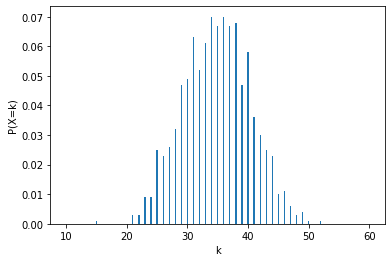

In [12]:
x = []
y = []
for (k,pk) in loi :
  x.append(k)
  y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

In [13]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
  # On détermine Omega_X
  if valeurs_possibles is None :
    omegax = numpy.unique(valeurs_obtenues)
  else :
    omegax = valeurs_possibles
  # On calcule ensuite le nombre de fois où chaque
  # valeur de Omega_X apparait dans l'ensemble des valeurs 
  # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
  res = []
  for k in omegax :
      res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
  return res

In [14]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 10000)
loi = estimation_loi(valeurs_simulees)
print(loi)

[(16, 0.0001), (17, 0.0001), (18, 0.0005), (19, 0.0004), (20, 0.0016), (21, 0.0028), (22, 0.0035), (23, 0.0062), (24, 0.0101), (25, 0.0129), (26, 0.0164), (27, 0.026), (28, 0.0338), (29, 0.0377), (30, 0.0487), (31, 0.0568), (32, 0.0665), (33, 0.0696), (34, 0.0724), (35, 0.0755), (36, 0.0674), (37, 0.0679), (38, 0.0659), (39, 0.0544), (40, 0.0445), (41, 0.0397), (42, 0.0335), (43, 0.0244), (44, 0.0191), (45, 0.0143), (46, 0.0099), (47, 0.0069), (48, 0.0042), (49, 0.0024), (50, 0.0021), (51, 0.0011), (52, 0.0005), (53, 0.0001), (54, 0.0001)]


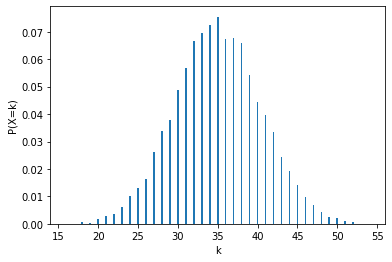

In [15]:
x = []
y = []
for (k,pk) in loi :
  x.append(k)
  y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

# Exercices

## 5000 simplifié

Issues possibles

In [16]:
def jet5des():
    return random.choices([1, 2, 3, 4, 5, 6], k=5)

convertion en valeurs

In [17]:
def valeurs(jet):
    val = {"50": 0,
          "100": 0,
          "0": 0}
    for de in jet :
        if de == 5 :
            val["50"] += 1 
        elif de == 1 :
            val["100"] += 1
        else :
            val["0"] += 1
    return val

définition d'un jeu

In [19]:
def jeu():
    des = jet5des()
    return valeurs(des)

Expériences répétées

In [23]:
def experience5000(nrep):
    return [valeurs(jet5des()) for _ in range(nrep)]

loi de probabilité

In [24]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
    # On détermine Omega_X
    if valeurs_possibles is None :
        omegax = numpy.unique(valeurs_obtenues)
    else :
        omegax = valeurs_possibles
        # On calcule ensuite le nombre de fois où chaque
        # valeur de Omega_X apparait dans l'ensemble des valeurs 
        # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
        res = []
        for k in omegax :
            res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
        return res

In [25]:
résultats = experience5000(10000)
loi = estimation_loi(résultats, list(range(0,500+50,50)))
print(loi)

[(0, 0.0), (50, 0.0), (100, 0.0), (150, 0.0), (200, 0.0), (250, 0.0), (300, 0.0), (350, 0.0), (400, 0.0), (450, 0.0)]
